# Chap 3. How to minimize cost
## 1. Cost function graph (convex function)

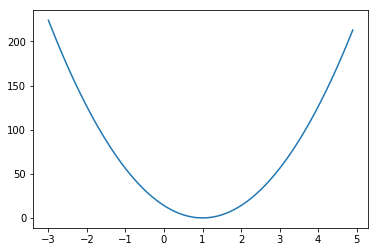

In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

# Model parameters
W = tf.placeholder(tf.float32)

# Model input and output
x = [1, 2, 3]
y = [1, 2, 3]

# Our hypothesis
hypothesis = x * W

# cost/loss function
cost = tf.reduce_sum(tf.square(hypothesis - y))  # sum of the squares

# launch the graph in a session
init = tf.global_variables_initializer()    # over rev 1.0 api
sess = tf.Session()
sess.run(init)  # reset values to wrong

# Variables for flotting cost function
W_val = []
cost_val = []

for i in range(-30, 50):
    feed_W = i * 0.1 # swing -3 ~ 5
    curr_cost, curr_W = sess.run([cost, W], feed_dict={W: feed_W})
    W_val.append(curr_W)
    cost_val.append(curr_cost)

# Show the cost function
plt.plot(W_val, cost_val)
plt.show()

\begin{equation*}
cost(W)=\frac{1}{m}\sum_{i=1}^{m}(H({x})^i - y^i)^2
\end{equation*}
- 위 그래프는 x 축은 W, y 축은 cost 값이며, W가 1일때 cost가 0으로 최소화 되고 있다.
- Machine learning은 위와 같은 convex function 그래프를 만들어야하고, 최소화를 시키는 W(weight), b(bias) 값을 찾는데 목적이 있다.

## 2. Gradient Descent Algorithm (GDA)
- Minimize cost function
- Gradient descent is used many minimization problems
- For a given cost function, cost(W, b), it will find W, b to minimize cost
- It can be applied to more general function:
    - cost (w1, w2, ...)
- 어떤 위치에서 시작하더라도 최소 비용에 수렴한다.
- 그러나 learning rate가 너무 클 경우 발산할수 있다.

## 3. How it works
- Start with initial guesses
  - Start at 0,0 (or any other value)
  - Keeping changing W and b a little bit to try and reduce cost(W, b)
- Each time you change the parameters, you select the gradient which reduces cost(W, b) the most possible
- Repeat
- Do so until you converge to a local minimum
- Has an interesting property
    - Where you start can determine which minimum you end up
- learning rate가 경사도를 구하는 두점의 거리이며, 경사도란 두점의 기울기이다. 즉 미분을 하면된다.


## 4. Formal definition
\begin{equation*}
cost(W)=\frac{1}{m}\sum_{i=1}^{m}(H({x})^i - y^i)^2
\end{equation*}

이와같은 cost function을 미분하면 아래와 같은 결과식을 얻게된다.

\begin{equation*}
W := W - \alpha \frac{1}{m}\sum_{i=1}^{m}(W({x})^i - y^i)x^i
\end{equation*}
- 미분을 한다는것은 결국 W의 다음번 위치를 판단하기위한 위한 것이다. 현재의 위치에서 변화량을 계산하여 현재의 W에서 빼면 다음 W의 위치가 나오게 되는것이다.
- 위 convex function 그래프에서 한점이 왼쪽 경사에 있을 때는 기울기("\")가 음수가 되어서 W의 값이 증가 하게 된다.
\begin{equation*}
W := W - \alpha -\nabla = W + \alpha \nabla
\end{equation*}
- 위 convex function 그래프에서 한점이 오른쪽 경사에 있을 때는 기울기("/")가 양수가 되어서 W의 값이 감소하게 된다.
\begin{equation*}
W := W - \alpha x -\nabla = W - \alpha \nabla
\end{equation*}
- 결국 어느 위치에 있건 중앙에 있는 cost가 가장 적게 발생하는 최소 비용에 수렴하게 된다.
- 알파는 learning rate를 나타내는 상수로서 경사의 두점의 간격을 정의하는 상수로서 개발자가 테스트를 통해 최적의 값을 찾아야 한다. 보통 0.1 ~ 0.001 사이의 값을 사용한다.
- 이것을 Tensorflow에서 구현을 하면 아래와 같다.

In [21]:
'''
# Minimize: Gradient Descent using derivative: W -= learning_rate * derivative
learning_rate = 0.1
gradient = tf.reduce_mean((W * X - Y) * X)
descent = W - learning_rate * gradient
update = W.assign(descent)
'''

'\n# Minimize: Gradient Descent using derivative: W -= learning_rate * derivative\nlearning_rate = 0.1\ngradient = tf.reduce_mean((W * X - Y) * X)\ndescent = W - learning_rate * gradient\nupdate = W.assign(descent)\n'

## 5. Convex function
- 아래와 같이 cost function을 설계할 경우 시작점에 따라 W, b의 값이 달라 질수 있다.
<img src="http://blog.datumbox.com/wp-content/uploads/2013/10/gradient-descent.png" alt="" title="" />

- cost function을 설계할때는 반드시 아래와 같이 convex function의 형태가 되도록 해야 Gradient Descent Algorithm을 정상적으로 적용할수 있다. 만약 그렇지 않다면 global optimum을 찾지 못하고 local optimum을 찾게되어 학습은 실패하게 된다.
- convex function의 경우 어떤 점에서 시작을 하더라도 반드시 최소의 기울기를 찾을수 있다.
<img src="https://qph.fs.quoracdn.net/main-qimg-e682b0c1029917edb4dafa63fb6d6c2c" alt="" title="" />


## 6. Lab1: Gradient Descent Algorithm Implementation

In [1]:
################################################################################
# lab3-2 : Linear Regression Minizing cost
#          Gradient Descent Algorithm
################################################################################
import tensorflow as tf

x_data = [1, 2, 3]
y_data = [1, 2, 3]

# Model parameters
W = tf.Variable(tf.random_normal([1]), name='weight')

# Model input and output
x = tf.placeholder(tf.float32)
y = tf.placeholder(tf.float32)

# Our hypothesis
linear_model = x * W

# cost/loss function
cost = tf.reduce_sum(tf.square(linear_model - y))  # sum of the squares

# Minimize: Gradient Descent using derivative: W -= learning_rate * deriavtive
learning_rate = 0.1
gradient = tf.reduce_mean((W * x - y) * x)
descent = W - learning_rate * gradient
update = W.assign(descent)

# launch the graph in a session
init = tf.global_variables_initializer()    # over rev 1.0 api
sess = tf.Session()
sess.run(init)  # reset values to wrong

for step in range(20):
    sess.run(update, feed_dict={x: x_data, y: y_data})
    print(step, "\tcost:", sess.run(cost, feed_dict={x: x_data, y: y_data}), "\tW:", sess.run(W))

sess.close()

0 	cost: 16.763687 	W: [-0.09426057]
1 	cost: 4.7683377 	W: [0.41639435]
2 	cost: 1.356327 	W: [0.68874365]
3 	cost: 0.38579977 	W: [0.8339966]
4 	cost: 0.1097386 	W: [0.91146487]
5 	cost: 0.031214515 	W: [0.95278126]
6 	cost: 0.008878812 	W: [0.9748167]
7 	cost: 0.002525512 	W: [0.9865689]
8 	cost: 0.00071836286 	W: [0.9928368]
9 	cost: 0.00020433844 	W: [0.9961796]
10 	cost: 5.8125253e-05 	W: [0.9979624]
11 	cost: 1.6533199e-05 	W: [0.9989133]
12 	cost: 4.7030344e-06 	W: [0.9994204]
13 	cost: 1.3379042e-06 	W: [0.9996909]
14 	cost: 3.8041532e-07 	W: [0.99983513]
15 	cost: 1.08179776e-07 	W: [0.9999121]
16 	cost: 3.0789398e-08 	W: [0.9999531]
17 	cost: 8.773782e-09 	W: [0.99997497]
18 	cost: 2.4956535e-09 	W: [0.99998665]
19 	cost: 7.018066e-10 	W: [0.9999929]


- 위 소스코드는 cost 함수가 간단하여 미분식(gradient)을 간단하게 직접 구현하였으나,
cost 함수가 복잡하여질경우 구현이 어렵다. 그래서 아래와 같이 Tensorflow에서 구현한 함수를 사용한다.

In [22]:
'''
# Minimize: Gradient Descent Magic
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1)
train = optimizer.minimize(cost)
'''

'\n# Minimize: Gradient Descent Magic\noptimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1)\ntrain = optimizer.minimize(cost)\n'

## 7. Lab2: Gradient Descent Algorithm Test1 (W = 5.0)

In [18]:
import tensorflow as tf

x_data = [1, 2, 3]
y_data = [1, 2, 3]

# Model parameters
W = tf.Variable(5.0)

# Model input and output
X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)

# Our hypothesis
hypothesis = X * W

# cost/loss function
cost = tf.reduce_mean(tf.square(hypothesis - Y))  # sum of the squares

# Minimize: Gradient Descent Magic
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1)
train = optimizer.minimize(cost)

# launch the graph in a session
init = tf.global_variables_initializer()    # over rev 1.0 api
sess = tf.Session()
sess.run(init)  # reset values to wrong

for step in range(10):
    print(step, "\tcost:", sess.run(cost, feed_dict={X: x_data, Y: y_data}), "\tW:", sess.run(W))
    sess.run(train, {X: x_data, Y: y_data})

sess.close()

0 	cost: 74.666664 	W: 5.0
1 	cost: 0.3318512 	W: 1.2666664
2 	cost: 0.0014748968 	W: 1.0177778
3 	cost: 6.555027e-06 	W: 1.0011852
4 	cost: 2.91322e-08 	W: 1.000079
5 	cost: 1.2839034e-10 	W: 1.0000052
6 	cost: 5.163277e-13 	W: 1.0000004
7 	cost: 0.0 	W: 1.0
8 	cost: 0.0 	W: 1.0
9 	cost: 0.0 	W: 1.0


- W가 최초 5.0이면 Covex curve 오른쪽 경사면 제일 위쪽에 위치 했는데, 학습을 거듭할수록 W가 1.0에 수렴하는 것을 알수 확인할수 있다.

## 8. Lab3: Gradient Descent Algorithm Test2 (W = -3.0)

In [19]:
import tensorflow as tf

x_data = [1, 2, 3]
y_data = [1, 2, 3]

# Model parameters
W = tf.Variable(-3.0)

# Model input and output
X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)

# Our hypothesis
hypothesis = X * W

# cost/loss function
cost = tf.reduce_mean(tf.square(hypothesis - Y))  # sum of the squares

# Minimize: Gradient Descent Magic
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1)
train = optimizer.minimize(cost)

# launch the graph in a session
init = tf.global_variables_initializer()    # over rev 1.0 api
sess = tf.Session()
sess.run(init)  # reset values to wrong

for step in range(10):
    print(step, "\tcost:", sess.run(cost, feed_dict={X: x_data, Y: y_data}), "\tW:", sess.run(W))
    sess.run(train, {X: x_data, Y: y_data})

sess.close()

0 	cost: 74.666664 	W: -3.0
1 	cost: 0.3318512 	W: 0.7333336
2 	cost: 0.0014748932 	W: 0.98222226
3 	cost: 6.555027e-06 	W: 0.9988148
4 	cost: 2.91322e-08 	W: 0.99992096
5 	cost: 1.3195844e-10 	W: 0.9999947
6 	cost: 5.163277e-13 	W: 0.99999964
7 	cost: 2.4868996e-14 	W: 0.99999994
8 	cost: 0.0 	W: 1.0
9 	cost: 0.0 	W: 1.0


- W가 최초 -3.0이면 Covex curve 왼쪽 경사면 제일 위쪽에 위치 했는데, 학습을 거듭할수록 W가 1.0에 수렴하는 것을 알수 확인할수 있다.

## 9. Compute gradient and Apply Gradient

- 여기서 GradientDescentOptimizer()로 계산된 gradient값과 W(weight)값을 돌려준다
  - gvs = optimizer.compute_gradients(cost) 

- 이곳에서 gradient값을 변경할수 있다. 현재는 그대로 사용
  - gvs = gvs 

- 여기서 수정된 gradient 값을 적용 시켜준다
  - apply_gradients = optimizer.apply_gradients(gvs)